# Conjugacy & Maximum Likelihood

---

### Learning Objectives
- Understand the Beta Distribution
- Describe the concept of "conjugacy" and "conjugate priors" in Bayesian statistics
- Set up an example of the Beta-Binomial model using election data
- Calculate the Maximum Likelihood Estimate
- Use the Beta-Binomial model to build our example in a Bayesian framework

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
biden_1 = [0.70, 0.60, 0.75, 0.40, 0.70, 0.60, 0.40, 0.60, 0.5, 0.6]
biden_2 = [0.50, 0.60, 0.75, 0.45, 0.60, 0.60, 0.40, 0.60, 0.5, 0.6]
bernie = [0.20, 0.25, 0.25, 0.45, 0.30, 0.37, 0.45, 0.10, 0.35, 0.30]

## 2020 Democratic Party presidential primaries
---

For today's lecture, we're going to focus on the 2020 presidential race. It's custom for the incumbent (Trump) to run unopposed for their party, so we'll target the pool of Democratic challengers. Here are the current front runners:

- Joe Biden
- Bernie Sanders
- Kamala Harris
- Beto O'Rourke
- Elizabeth Warren
- Cory Booker
- Pete Buttigieg

In keeping with the spirit of Bayes, we need to create a prior that represents our beliefs about the outcome of this primary. From there, we'll gather some recent polling results from [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-primaries/democratic/national/) and use that data to update our beliefs as a posterior distribution.

## Who should we represent?
---

Let's imagine we're a consultancy, and all the candidates are interested in our services (because we're awesome, of course). Ethics dictate that we only choose one candidate to represent, so we'll vote on who we'll work for:

Cast your vote in the **anonymous** Slack poll:

/poll "Who should we work for?" "Joe Biden" "Bernie Sanders" "Kamala Harris" "Beto O'Rourke" "Elizabeth Warren" "Cory Booker" "Pete Buttigieg" anonymous

## Our objective: understand the posterior distribution
---

$p$ is the parameter we're trying to learn more about: the proportion of votes our candidate will get. 

To get a posterior for $p$, we'll do the following:
1. Establish a **prior** belief about $p$ as a distribution: $f(p)$
2. Use recent polling data to create our Binomial likelihood: $f(n,k|p)$
    - `n` is the total survey responses
    - and `k` is the number of responses in favor of our candidate
3. Use that data to update our belief about $p$ as a posterior distribution: $f(p|n,k)$

Mathematically, our objective can be summarized using a variant of Bayes' rule:

### $$f(p|n,k) \propto f(n,k|p) * f(p)$$

## Our prior and posterior beliefs must be distributions
---

In Bayesian statistics, we interested in both $p$ **and the uncertainty that surrounds $p$.** Therefore, the prior and posterior will both be distributions, where:
- the X-axis is infinite number of probabilities between 0 and 1
- and the Y-axis represents our **confidence** in each of those probabilities.

In [3]:
biden_1 = [0.70, 0.60, 0.75, 0.40, 0.70, 0.60, 0.40, 0.60, 0.5, 0.6]
biden_2 = [0.50, 0.60, 0.75, 0.45, 0.60, 0.60, 0.40, 0.60, 0.5, 0.6]
bernie = [0.20, 0.25, 0.25, 0.45, 0.30, 0.37, 0.45, 0.10, 0.35, 0.30]

In [4]:
0.60, 0.10
0.60, 0.10
0.75, 0.15
0.45, 0.25

(0.45, 0.25)

## Step 1: Establish our prior
---

We need to get everyone's opinion about the **percentage of votes our candidate will win**. To accomplish this, let's do the following:

1. For each local market, appoint someone to compile a list of everyone's guesses
2. Once you've appointed someone, you'll Slack them your belief about the percentage of votes our candidate will get **as a float between 0 and 1**
    - Send your appointee a direct message so that your opinion doesn't influence anyone else
    - We want your **raw** opinion, so no Googling!
    - **Don't choose 0 or 1** (It'll break our code)
3. After the appointee has everyone's percentages, send them out as a python list in the main Slack channel like so:
```python
austin = [.5, .5, .5, .5, .5, ...]
```
4. Once we have the priors from every market, we'll consolidate them into a single list

In [5]:
prior_tor = [0.6, 0.25, 0.30, 0.70, 0.5, 0.3, 0.45, 0.35, 0.55, 0.42, 0.68]

In [6]:
print(np.mean(biden_2))
print(np.std(biden_2))

0.5599999999999999
0.09433981132056603


In [7]:
np.mean(prior_tor)

0.4636363636363636

In [8]:
np.std(prior_tor)

0.14901328356118443

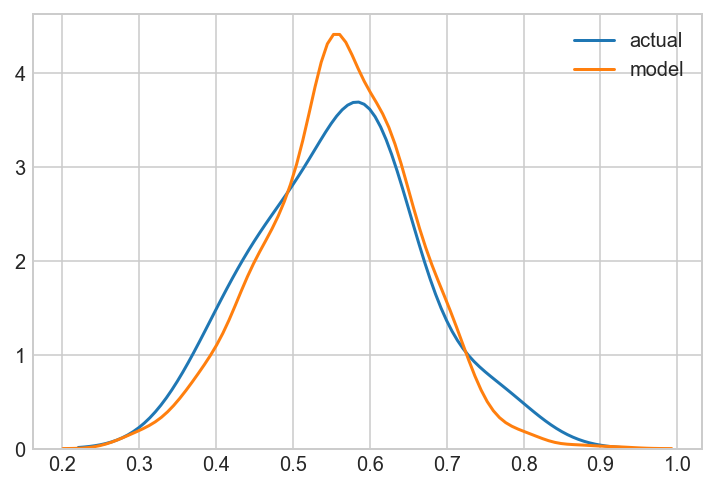

In [9]:
import seaborn as sns

sns.kdeplot(biden_2, label='actual')
sns.kdeplot(np.random.normal(0.559999, 0.0943, 1000), label='model')

In [10]:
collective_probs = np.random.normal(.559999, .09990, 100000)
collective_probs[:5]

array([0.5671335 , 0.42899275, 0.54822337, 0.39737106, 0.62959322])

## Perform statistics on our sample
---

In the cells below, do the following:
1. Calculate the mean and standard deviation of our sample
2. Plot the sample as a histogram

In [11]:
collective_probs.mean()

0.5597441739576814

In [12]:
collective_probs.std()

0.09997150666478563

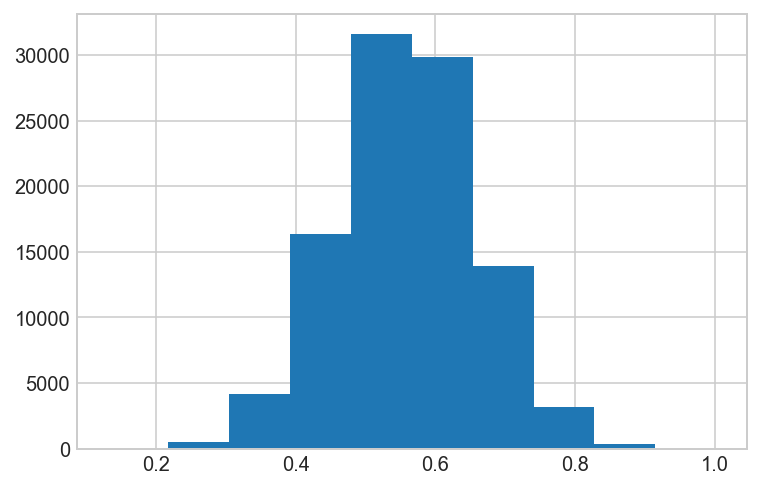

In [13]:
plt.hist(collective_probs);

## Pros and Cons of our prior
---

From a Bayes perspective, our histogram is superior to the point estimate (the mean) because it accounts for the uncertainty surrounding our belief about $p$. 

However, it comes up short in that it doesn't assign a belief to the infinite number of probabilities that exist between 0 and 1.

In [14]:
np.random.uniform(30, 45)
np.random.normal(30, 5)
np.random.normal(30, 0.0001)

30.000070848435293

In [15]:
a = 30
attempts = 100 
attempts - a

np.random.beta(30, 70, 100)

array([0.2715331 , 0.28299311, 0.33799219, 0.2669071 , 0.30394056,
       0.27780801, 0.26754988, 0.29249952, 0.35023777, 0.33045773,
       0.28099509, 0.34401849, 0.26459471, 0.29146145, 0.29927401,
       0.29770742, 0.31079615, 0.2757464 , 0.29232342, 0.3763069 ,
       0.36643516, 0.28149655, 0.32000148, 0.23600941, 0.24151439,
       0.35737565, 0.34364002, 0.28910501, 0.27875616, 0.2240756 ,
       0.29959024, 0.35401063, 0.20419558, 0.43251076, 0.36363513,
       0.28423421, 0.34226433, 0.25467573, 0.30242938, 0.292896  ,
       0.26294714, 0.36308121, 0.32591878, 0.28525144, 0.28938443,
       0.24848563, 0.35501523, 0.26886444, 0.29762625, 0.31367447,
       0.32985624, 0.28100575, 0.25357261, 0.31915433, 0.29824832,
       0.29059419, 0.33760814, 0.35437237, 0.27812748, 0.30514778,
       0.32127789, 0.41276375, 0.26792078, 0.34824251, 0.25713054,
       0.24984935, 0.31087215, 0.22924758, 0.31848416, 0.33593508,
       0.24056764, 0.22296886, 0.23963155, 0.22162301, 0.31480

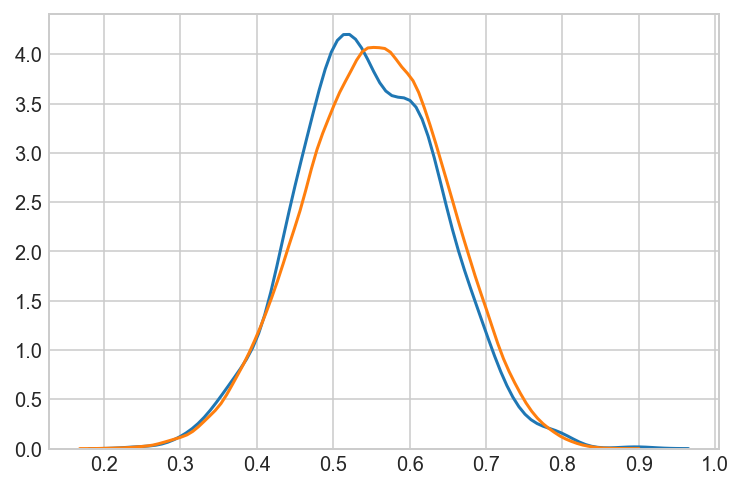

In [16]:
sns.kdeplot(np.random.normal(0.55, 0.09, 1000))
sns.kdeplot(np.random.beta(15, 12, 100000))

We can remedy this by representing our beliefs about $p$ _as a continuous distribution_: $f(p)$. 

## The Beta distribution
---

The Beta distribution works perfectly for our prior because it **represents _a distribution of probabilities_**. 

The beta distribution is parameterized by two values, $\alpha$ and $\beta$.

###  $$ Beta(\alpha, \beta) =
\begin{cases}
\alpha &= \text{number of successes + 1} \\
\beta &= \text{number of failures + 1}
\end{cases} $$

The mean of the Beta distribution is defined as:

### $$\mu = \dfrac{\alpha}{\alpha + \beta}$$


## Fit a Beta distribution to our list of percentages
---
We now need to come up with the parameters $\alpha$ and $\beta$ in order to create a Beta distribution that best represents our prior beliefs. Thankfully, `scipy` has a method that will fit a beta distribution to our list of percentages: 
```python
stats.beta.fit(list_of_percentages, floc=0, fscale=1)
```
Where:
- `floc` is the minimum boundary for our distribution
- and `fscale` is maximum bounder minus the minimum

This will return 4 values:
1. `alpha`
2. `beta`
3. `loc` (0)
4. `scale` (1)

In the cell below, let's fit a beta distribution to our list of percentages:

In [17]:
biden_2

[0.5, 0.6, 0.75, 0.45, 0.6, 0.6, 0.4, 0.6, 0.5, 0.6]

In [18]:
from scipy import stats

In [19]:
alpha_prior, beta_prior, _, _ =  stats.beta.fit(biden_2, floc=0, fscale=1)

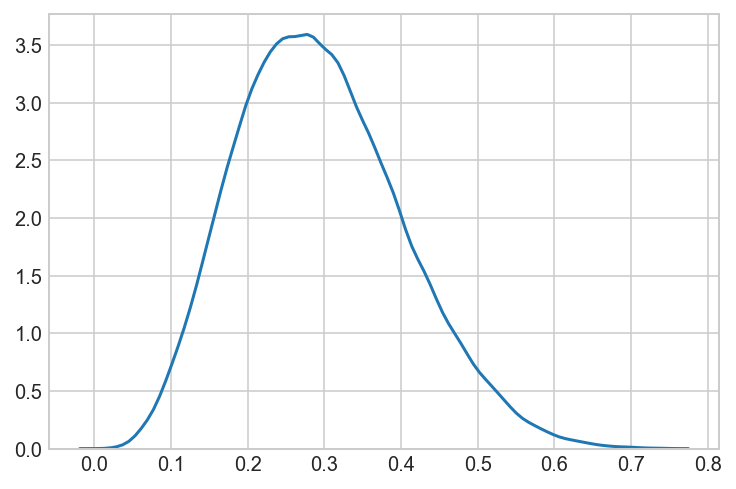

In [20]:
stats.beta.fit(bernie, floc=0, fscale=1)
sns.kdeplot(np.random.beta(5, 12, 100000));

In [21]:
alpha_prior

14.850454480627855

In [22]:
beta_prior

11.652559696824165

In [23]:
prior_distn = stats.beta(alpha_prior, beta_prior)

In [24]:
prior_distn.mean()

0.5603307752543174

In [25]:
prior_distn.std()

0.09464444426842829

## Plot the beta prior
---

In the cell below, let's plot our beta distribution. Use `numpy.linspace` to create a list of probabilities for plotting the x axis.

In [26]:
percentages_for_plotting_x_axis = np.linspace(0, 1, 1001)

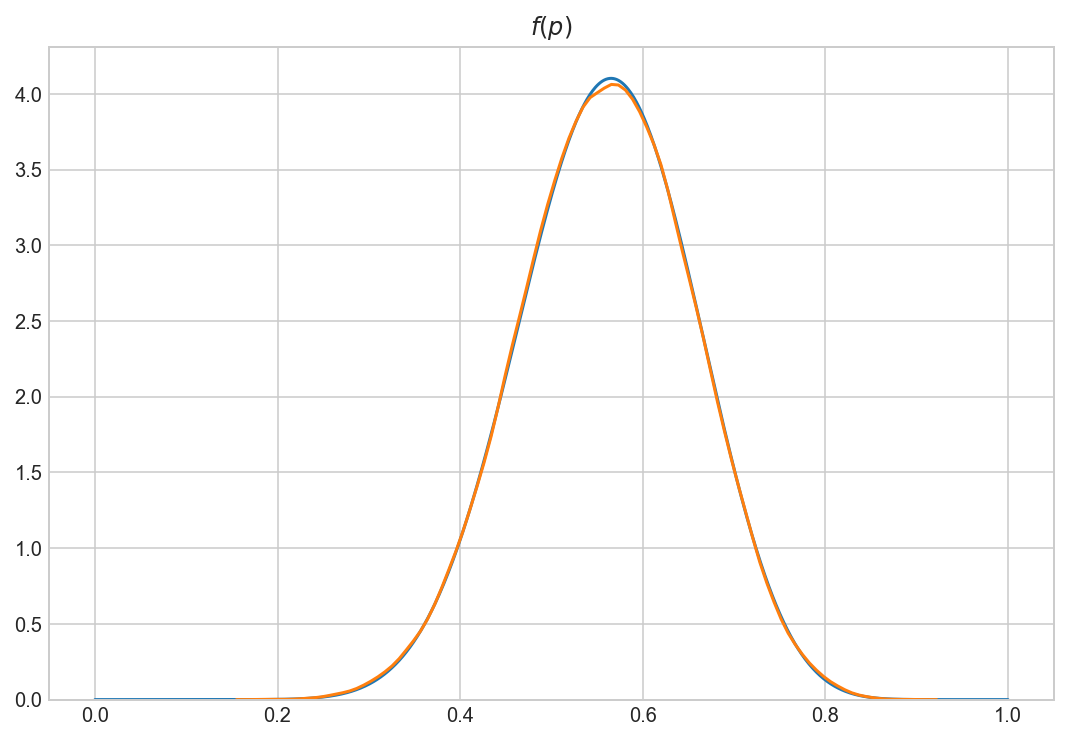

In [27]:
plt.figure(figsize=(9,6))
plt.plot(percentages_for_plotting_x_axis, prior_distn.pdf(percentages_for_plotting_x_axis))
sns.kdeplot(np.random.beta(alpha_prior, beta_prior, 100000))
plt.title('$f(p)$');

## Step 2: Establish our likelihood function
---

Now we need to update our beliefs with some data. [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-primaries/democratic/national) is an excellent resource for political polling information. 

Let's use the results from the 5 most recent polls for our likelihood:

<div style="float: left">

| Dates               | Pollster              | Sample Size | Biden | Sanders | Harris | O'Rourke | Warren | Booker | Buttigieg |
|---------------------|-----------------------|-------------|-------|---------|--------|----------|--------|--------|-----------|
| APR 12-15, 2019     | Change Research       | 2,518       | 529   | 504     | 176    | 227      | 201    | 101    | 428       |
| MAR 15-APR 15, 2019 | USC Dornsife/LA Times | 2,196       | 593   | 351     | 154    | 154      | 88     | 44     | 44        |
| APR 11-14, 2019     | Emerson College       | 356         | 85    | 103     | 28     | 28       | 25     | 7      | 32        |
| APR 8-14, 2019      | Morning Consult       | 12,550      | 3,891 | 2,887   | 1,130  | 1,004    | 879    | 502    | 879       |
| APR 1-7, 2019       | Morning Consult       | 13,644      | 4,366 | 3,138   | 1,228  | 1,092    | 955    | 546    | 682       |

</div>

This gives us the following totals:

```python
biden = 9464
sanders = 6983
harris = 2716
orourke = 2505
warren = 2148
booker = 1200
buttigieg = 2065


n_surveys = 31264
```

In [28]:
n_surveys = 17000
biden = 5666

<a id='pmf'></a>
## Review: the Binomial distribution probability mass function
---

Recall that the number of "success" trials in $n$ trials is modeled with the Binomial distribution. The binomial distribution has the probability mass function:

### $$ P(k, n \;|\; p) = \binom{n}{k} p^k (1 - p)^{(n-k)} $$

Where $k$ is the number of successes,

$n$ is the number of total trials,

and $p$ is the probability of success for each trial.

**We can calculate the probability mass function for a given $n$ and $p$:**

In [29]:
n_surveys = 10000
biden = n_surveys * 0.42

p = 0.10
dist = stats.binom(n_surveys, p)
dist.cdf(biden)

0.9999999999999999

In [30]:
def likelihood_fn(p):
    distn = stats.binom(n_surveys, p)
    return distn.pmf(biden)

likelihood_fn(.6)

3.64232893074825e-288

<a id='likelihood'></a>
## The Binomial likelihood
---

The likelihood represents the probability of observing $k$ successes out of $n$ trials _given a probability of success $p$._

This $p$ can be fixed, say at $p = 0.3$, in which case we would evaluate the likelihood at exactly that point. We could also represent $p$ as a distribution over the range of possible $p$ values. Evaluating the likelihood at all of our different "hypotheses" about what $p$ could be. 

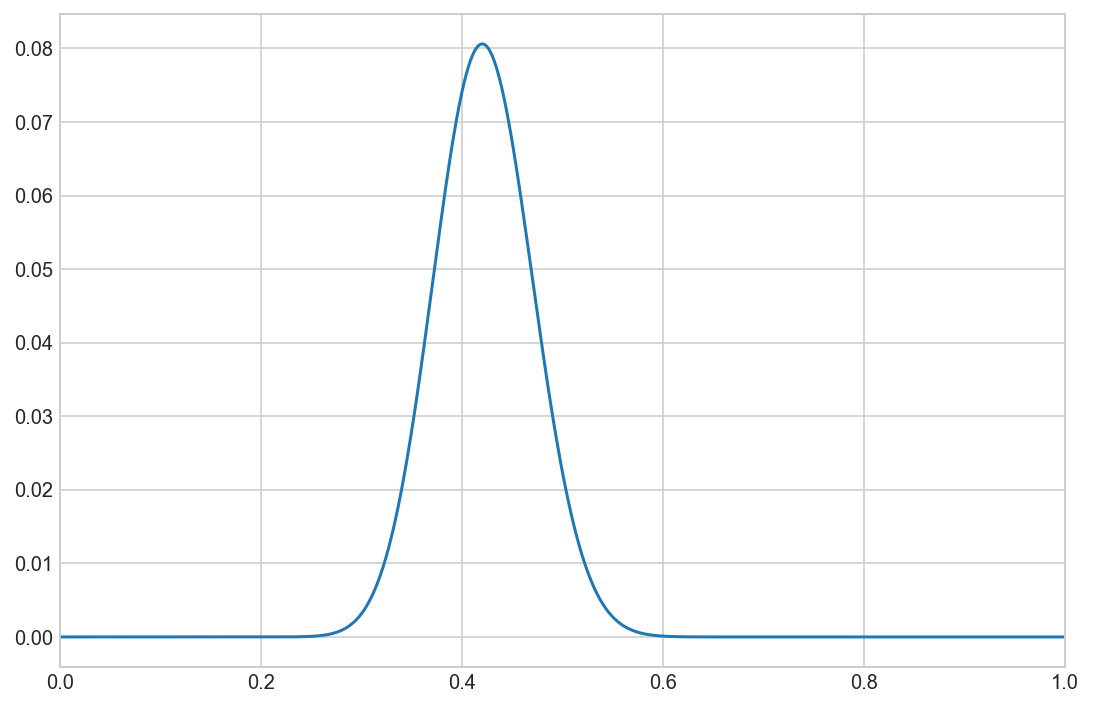

In [31]:
n_surveys = 100
biden = 42

likelihoods = [likelihood_fn(p) for p in percentages_for_plotting_x_axis]
plt.figure(figsize=(9,6))
plt.plot(percentages_for_plotting_x_axis, likelihoods)
plt.xlim([0, 1]);

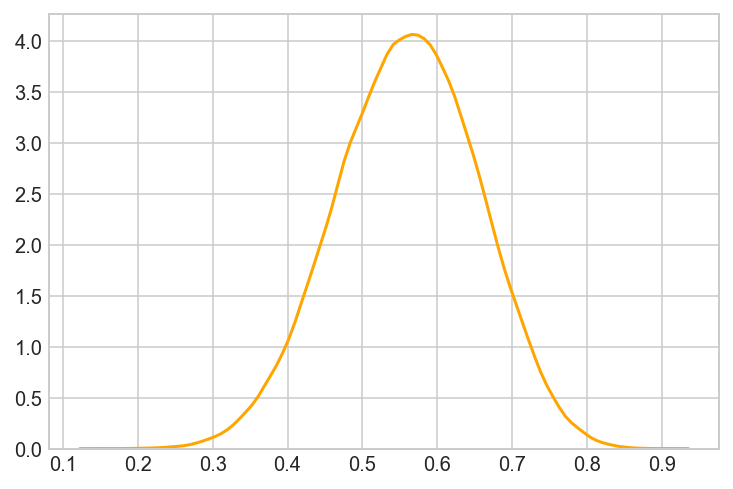

In [32]:
sns.kdeplot(np.random.beta(alpha_prior, beta_prior, 100000), color='orange');

<a id='mle'></a>
## The "Maximum Likelihood Estimate" for $p$
---

If we were to _just_ focus on the likelihood part of Bayes Theorem, we could ask "what is the value of the parameter $p$ that maximizes the value of the likelihood function?" This is precisely what we do in Frequentist statistics to find our point estimate of a parameter. 

Remember that Frequentists have no interest in the prior or posterior beliefs about the probability of the parameter's value. Frequentists state that there is no probability associated with a parameter. 

Because we only take a sample of people, we may by chance measure a percentage of votes for our candidate that deviates from that true probability to some degree. Remember: in Frequentist statistics, it is the data that has a probability rather than the parameter!

**For the Binomial distribution, we can easily calculate the value for $p$ that makes our observed data the most likely: it is going to be the fraction of survey responses in favor of our candidate, divided by the total responses.**

In [33]:
biden / n_surveys

0.42

<a id='beta-conjugate'></a>
## Putting it all together: the Beta as a "conjugate prior" to the Binomial likelihood
---

Let's recap what we've done up to this point:
1. We're trying to understand $p$: The proportion of votes our candidate will win
2. We created a beta distribution $f(p)$ to represent our prior beliefs about $p$
3. We've gathered survey data, and calculated the value for $p$ that maximizes the likelihood of the surveys we've observed.

Like our prior, our posterior distribution $f(p|n,k)$ will be a beta distribution as well. Because our likelihood function is binomial, creating the parameters $\alpha_{posterior}$ and $\beta_{posterior}$ for our beta distribution is a matter of simple addition:

### $$ \begin{aligned}
\alpha_{posterior} &= k + \alpha_{prior} \\
\beta_{posterior} &= n - k + \beta_{prior}
\end{aligned} $$


In [34]:
alpha_prior

14.850454480627855

In [35]:
beta_prior

11.652559696824165

In [36]:
k = 4200
n = 10000

In [37]:
a_posterior = 4200 + 14
b_posterior = 10000 - 4200 + 11

In [38]:
alpha_posterior = alpha_prior + biden
beta_posterior = n_surveys - biden + beta_prior
posterior_distn = stats.beta(alpha_posterior, beta_posterior)

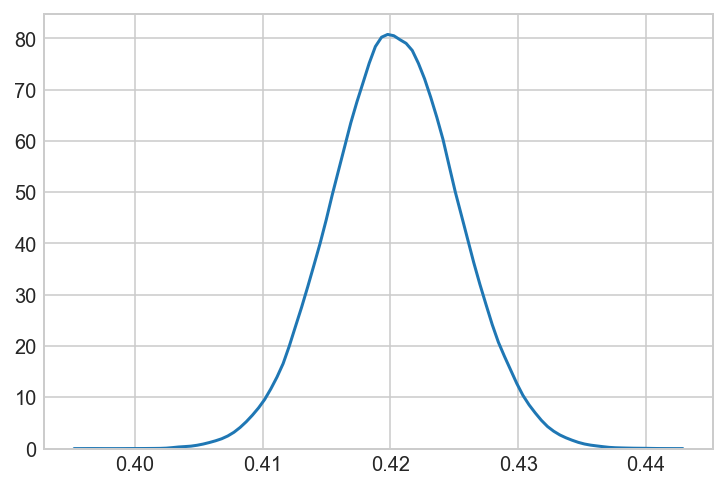

In [39]:
a_posterior
b_posterior

sns.kdeplot(np.random.beta(a_posterior, b_posterior, 100000));

## Conjugacy
---

Our prior and likelihood play nicely together because of one word: conjugacy. **Conjugacy** and "conjugate priors" are important concepts in Bayesian statistics. 

> The essential idea is that the *posterior* distribution is guaranteed to have the same mathematical form as the *prior* distribution when the prior distribution is a conjugate prior to the likelihood function.

There are [many conjugate priors and posteriors](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions). They are extremely useful because they make the prior-posterior update algebraically solvable. When there is no conjugate prior, sampling techniques such as Markov Chain Monte Carlo are often necessary.

This lecture covers the most classic conjugate prior scenario: the Beta-Binomial model. Binomial models are appropriate for binary events. The prior distribution on the probability of a binary event is a Beta distribution. As it turns out, the Beta distribution is conjugate to the Binomial likelihood and we are guaranteed to get out a posterior distribution that is also a Beta distribution.

(0.3, 0.35)

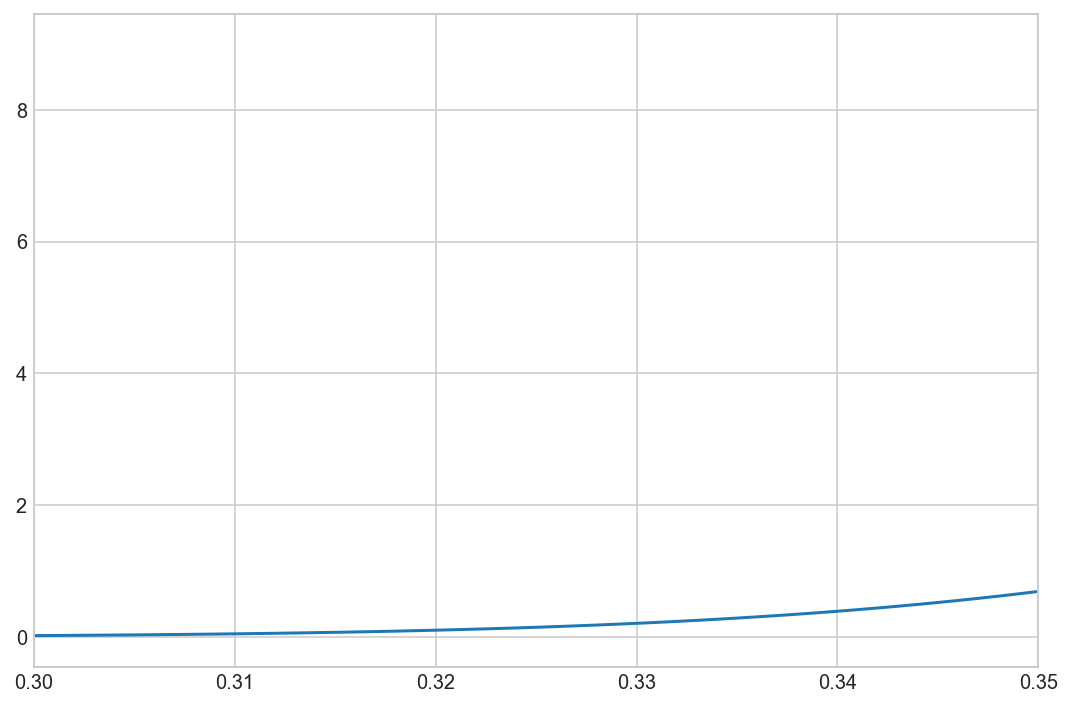

In [40]:
plt.figure(figsize=(9,6))
plt.plot(percentages_for_plotting_x_axis, posterior_distn.pdf(percentages_for_plotting_x_axis))
plt.xlim([0.30, 0.35])

## Maximum A Posteriori (MAP): Mode of Posterior Distribution
---

Once we have $\alpha_{posterior}$ and $\beta_{posterior}$ for the Beta distribution, we have completely characterized the probability of the conversion rate.

The MAP (i.e., mode of the posterior distribution) can be calculated quite easily if the mathematical form of the distribution is known.  For Beta it is

### $$MAP(\alpha, \beta) = \frac{\alpha - 1}{\alpha + \beta - 2}$$

In [41]:
(alpha_posterior - 1) / (alpha_posterior + beta_posterior - 2)

0.44858716754459577

## Tying it all together
---

The posterior distribution is the combination of our prior distribution with our likelihood function. The one with more data (in this case our likelihood) will have a greater influence on the posterior.

(0.4, 0.6)

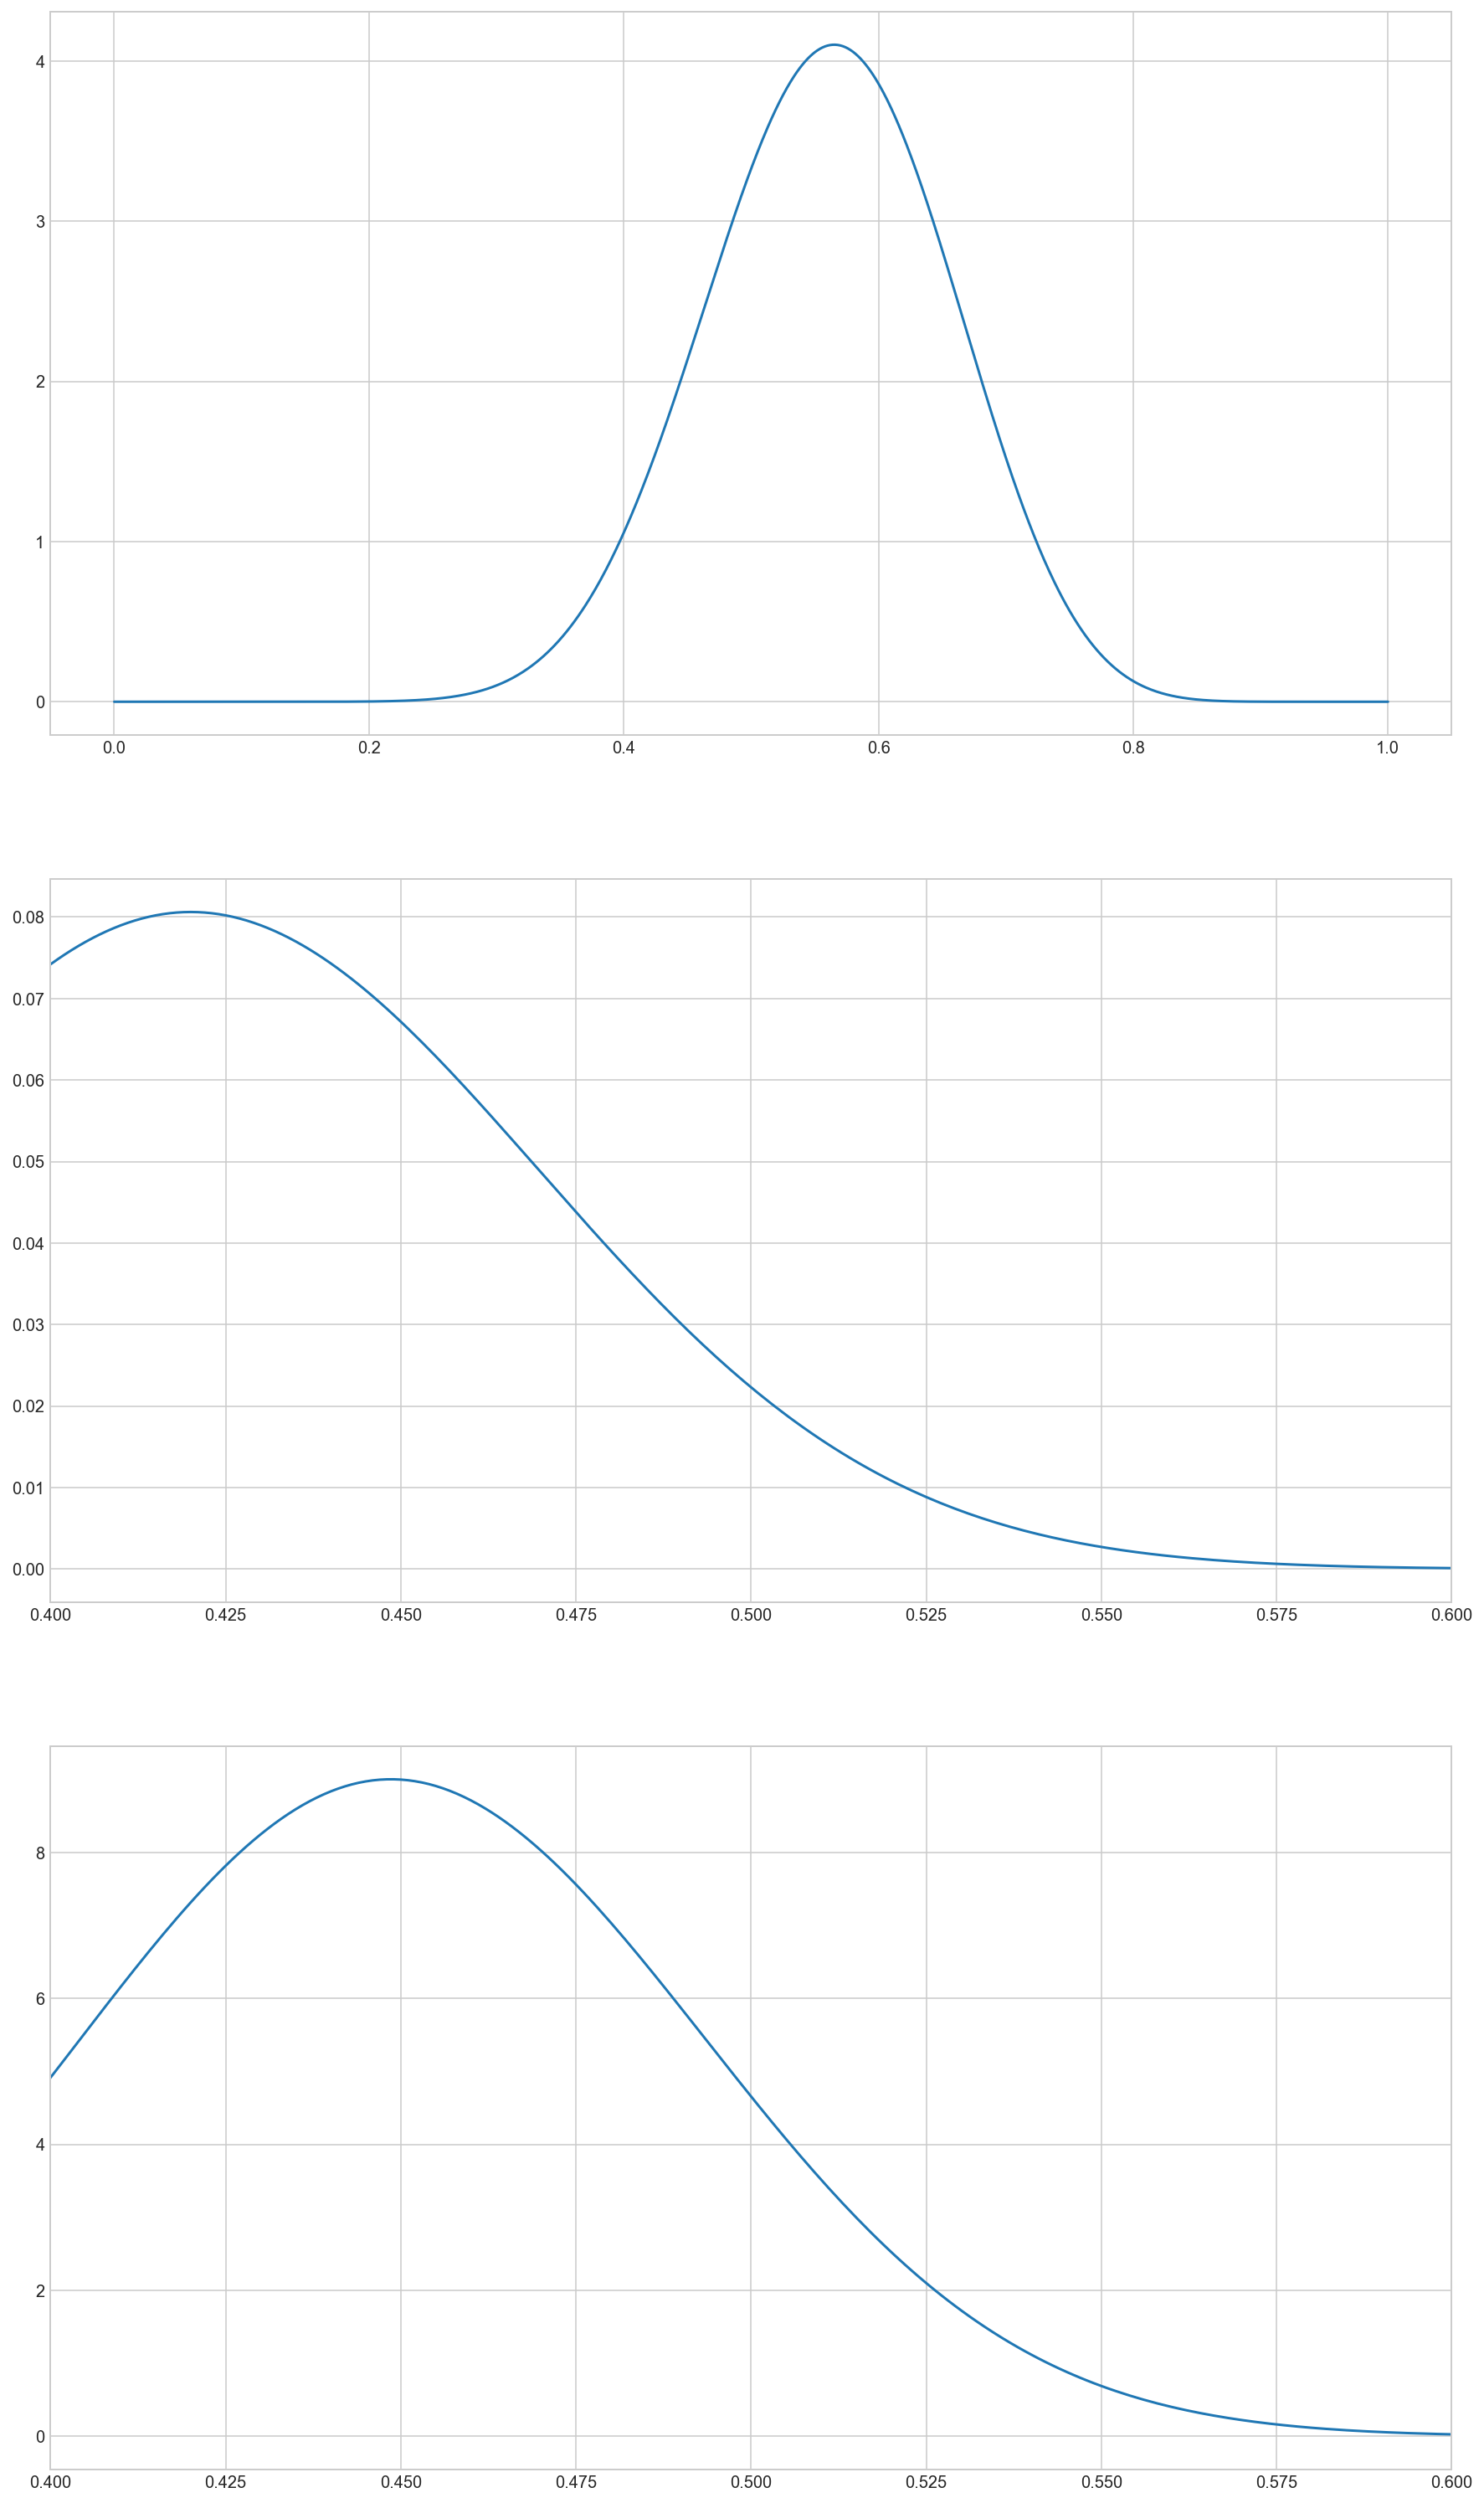

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 27))
axes[0].plot(percentages_for_plotting_x_axis, prior_distn.pdf(percentages_for_plotting_x_axis))

axes[1].plot(percentages_for_plotting_x_axis, likelihoods)
axes[1].set_xlim([0.4, 0.6])

axes[2].plot(percentages_for_plotting_x_axis, posterior_distn.pdf(percentages_for_plotting_x_axis))
axes[2].set_xlim([0.4, 0.6])